In [6]:
## all imports up here, rerun this block when adding
import pandas as pd
import numpy as np
import cv2 as cv
import sys
sys.path.insert(0, '../Synthetic Group Creation/')
from groups_generators import GroupsGenerator
sys.path.insert(0, '../Synthetic Group Creation/')
import config as cfg  

In [7]:
ratings_df = pd.read_csv("../../Datasets/XWines_Slim_1K_wines_150K_ratings/XWines_Slim_150K_ratings.csv", low_memory=False, encoding="utf-8", memory_map=True)
wines_df = pd.read_csv("../../Datasets/XWines_Slim_1K_wines_150K_ratings/XWines_Slim_1K_wines.csv", low_memory=False, encoding="utf-8", memory_map=True)

In [8]:
#wines_df = pd.read_csv("../../Datasets/All-XWines_Full_100K_wines_21M_ratings/XWines_Full_100K_wines.csv", low_memory=False, encoding="utf-8", memory_map=True)
#ratings_df = pd.read_csv("../../Datasets/All-XWines_Full_100K_wines_21M_ratings/XWines_Full_21M_ratings.csv", low_memory=False, encoding="utf-8", memory_map=True)

In [9]:
ratings_df.head()

,RatingID,UserID,WineID,Vintage,Rating,Date
0,143,1356810,103471,1950,4.5,2021-11-02 20:52:59
1,199,1173759,111415,1951,5.0,2015-08-20 17:46:26
2,348,1164877,111395,1952,5.0,2020-11-13 05:40:26
3,374,1207665,111433,1953,5.0,2017-05-05 06:44:13
4,834,1075841,111431,1955,5.0,2016-09-14 20:18:38


In [10]:
wines_df.shape

(1007, 17)

In [11]:
wines_df.head()

,WineID,WineName,Type,Elaborate,Grapes,Harmonize,ABV,Body,Acidity,Code,Country,RegionID,RegionName,WineryID,WineryName,Website,Vintages
0,100001,Espumante Moscatel,Sparkling,Varietal/100%,['Muscat/Moscato'],"['Pork', 'Rich Fish', 'Shellfish']",7.5,Medium-bodied,High,BR,Brazil,1001,Serra Gaúcha,10001,Casa Perini,http://www.vinicolaperini.com.br,"[2020, 2019, 2018, 2017, 2016, 2015, 2014, 201..."
1,100002,Ancellotta,Red,Varietal/100%,['Ancellotta'],"['Beef', 'Barbecue', 'Codfish', 'Pasta', 'Pizz...",12.0,Medium-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10001,Casa Perini,http://www.vinicolaperini.com.br,"[2016, 2015, 2014, 2013, 2012, 2011, 2010, 200..."
2,100003,Cabernet Sauvignon,Red,Varietal/100%,['Cabernet Sauvignon'],"['Beef', 'Lamb', 'Poultry']",12.0,Full-bodied,High,BR,Brazil,1001,Serra Gaúcha,10002,Castellamare,https://www.emporiocastellamare.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
3,100005,Maison de Ville Cabernet-Merlot,Red,Assemblage/Bordeaux Red Blend,"['Cabernet Sauvignon', 'Merlot']","['Beef', 'Lamb', 'Game Meat', 'Poultry']",11.0,Full-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10000,Aurora,http://www.vinicolaaurora.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
4,100007,Do Lugar Moscatel Espumantes,Sparkling,Varietal/100%,['Muscat/Moscato Bianco'],"['Pork', 'Rich Fish', 'Shellfish']",7.5,Medium-bodied,High,BR,Brazil,1001,Serra Gaúcha,10012,Dal Pizzol,http://www.dalpizzol.com.br,"[2018, 2017, 2016, 2015, 2014, 2013, 2012, 201..."


**Group settings**

In [12]:
group_sizes_to_create = cfg.group_sizes_to_create
group_similarity_to_create = cfg.group_similarity_to_create
group_number = cfg.group_number

# Similarity evaluation

In [13]:
# Counts the amount of ratings per user
ratings_per_user = ratings_df.groupby('UserID').size()

# Calculate the average number of ratings per user
average_number_of_rating = ratings_per_user.mean()

#Round Value
rounded_average_number_of_rating = round(average_number_of_rating)
print(rounded_average_number_of_rating)

14


In [14]:
# Count the number of ratings for each user
user_counts = ratings_df['UserID'].value_counts()

# Filter users who have at least the specified number of ratings
filtered_users = user_counts[user_counts <= rounded_average_number_of_rating].index

# Filter the DataFrame to keep only these users
ratings_df = ratings_df[ratings_df['UserID'].isin(filtered_users)]
print(ratings_df)

        RatingID   UserID  WineID Vintage  Rating                 Date
3            374  1207665  111433    1953     5.0  2017-05-05 06:44:13
4            834  1075841  111431    1955     5.0  2016-09-14 20:18:38
5            876  1211463  111395    1955     5.0  2021-12-02 23:12:49
6           1005  1076348  111433    1955     4.5  2021-06-19 19:53:56
8           1029  1225931  111431    1955     5.0  2017-04-24 01:41:52
...          ...      ...     ...     ...     ...                  ...
149993  21013409  1086949  111484    N.V.     4.5  2019-04-14 17:31:49
149994  21013430  1026866  111479    N.V.     4.0  2014-11-22 15:00:48
149995  21013438  1000052  111468    N.V.     4.5  2021-12-22 21:03:51
149997  21013494  1218581  113690    N.V.     3.5  2019-04-14 17:45:08
149999  21013509  1059173  111479    N.V.     5.0  2019-09-08 15:42:28

[70480 rows x 6 columns]


In [15]:
# computing similarity between each pair of users
user_matrix = ratings_df.pivot_table(columns='WineID', index='UserID', values='Rating')
user_id_set = set(ratings_df['UserID'])
user_id_indexes = user_matrix.index.values
user_matrix = user_matrix.fillna(0)
numpy_array = user_matrix.to_numpy()
sim_matrix = np.corrcoef(numpy_array)

## Visualization of the similarity distribution

Text(0.5, 0, "Pearson's Correlation Coeficient")

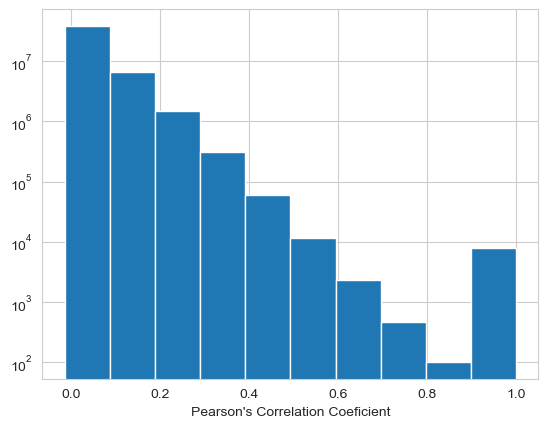

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(sim_matrix.flatten())
plt.yscale("log")
plt.xlabel("Pearson's Correlation Coeficient")

## Group creation

In [17]:
from groups_generators import GroupsGenerator
user_id_set = sorted(user_id_set)
group_list = list()

for group_type in group_similarity_to_create:
    grpGenerator = GroupsGenerator.getGroupsGenerator(group_type)
    current_list = grpGenerator.generateGroups(user_id_indexes, user_id_set, sim_matrix, group_sizes_to_create, group_number)
    group_list = group_list + current_list

group_dict = dict()
for group_id, group in zip(range(len(group_list)), group_list):
    group_dict[group_id] = group

20
40
60
20
40
60
20
40
60
20
40
60


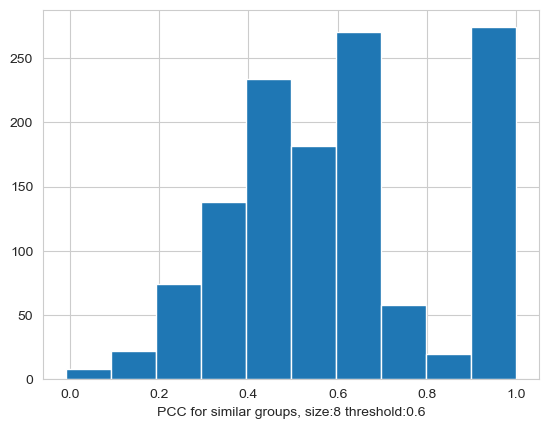

In [18]:
group_similarity = "similar"
group_size = 8
histogram_list = []
for gid in group_dict.keys():
    g = group_dict[gid]
    if g["group_similarity"] == group_similarity and g["group_size"] == group_size:
        member_index = [user_id_indexes.tolist().index(member) for member in g["group_members"]]
        s = sim_matrix[member_index]
        histogram_list.extend(s[:,member_index].flatten().tolist())

        
plt.hist(histogram_list)
#plt.yscale("log")
plt.xlabel("PCC for "+group_similarity+" groups, size:"+str(group_size)+" threshold:"+str(cfg.similar_threshold))    
plt.savefig("pcc_"+group_similarity+"_"+str(group_size)+"_"+str(int(cfg.similar_threshold*10))+".png", dpi=300)

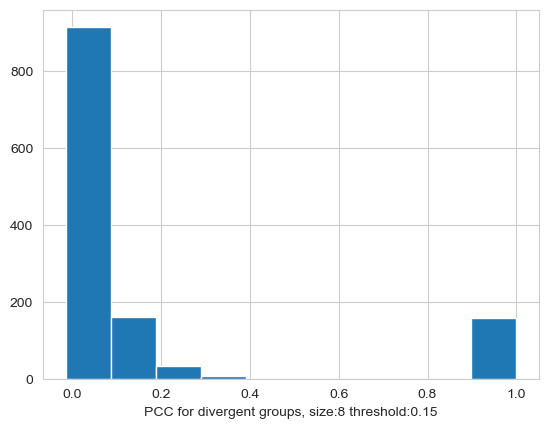

In [19]:
group_similarity = "divergent"
group_size = 8
histogram_list = []
for gid in group_dict.keys():
    g = group_dict[gid]
    if g["group_similarity"] == group_similarity and g["group_size"] == group_size:
        member_index = [user_id_indexes.tolist().index(member) for member in g["group_members"]]
        s = sim_matrix[member_index]
        histogram_list.extend(s[:,member_index].flatten().tolist())

        
plt.hist(histogram_list)
#plt.yscale("log")
plt.xlabel("PCC for "+group_similarity+" groups, size:"+str(group_size)+" threshold:"+str(cfg.dissimilar_threshold))    
plt.savefig("pcc_"+group_similarity+"_"+str(group_size)+"_"+str(int(cfg.dissimilar_threshold*10))+".png", dpi=300)

### Comparing groups internal average similarity between the different types and sizes 

In [20]:
groups_list = list()
for group in group_dict:
    groups_list.append(
        {
            'group_id': group,
            'group_size': group_dict[group]['group_size'],
            'group_similarity': group_dict[group]['group_similarity'],
            'group_members': group_dict[group]['group_members'],
            'avg_similarity': group_dict[group]['avg_similarity']
        }
    )

groups_df = pd.DataFrame.from_records(groups_list)
display(groups_df.head(10))

,group_id,group_size,group_similarity,group_members,avg_similarity
0,0,2,random,"[1289797, 1393700]",-0.009674
1,1,2,random,"[1366127, 1004168]",-0.008242
2,2,2,random,"[1240789, 1277541]",-0.010677
3,3,2,random,"[1689752, 1155516]",0.079470
4,4,2,random,"[1402831, 1135188]",-0.010666
5,5,2,random,"[1019546, 1216671]",0.084150
6,6,2,random,"[1250221, 1364007]",-0.011004
7,7,2,random,"[2049904, 1298350]",-0.008542
8,8,2,random,"[1009530, 1457483]",0.173955
9,9,2,random,"[1004382, 1275951]",-0.009082


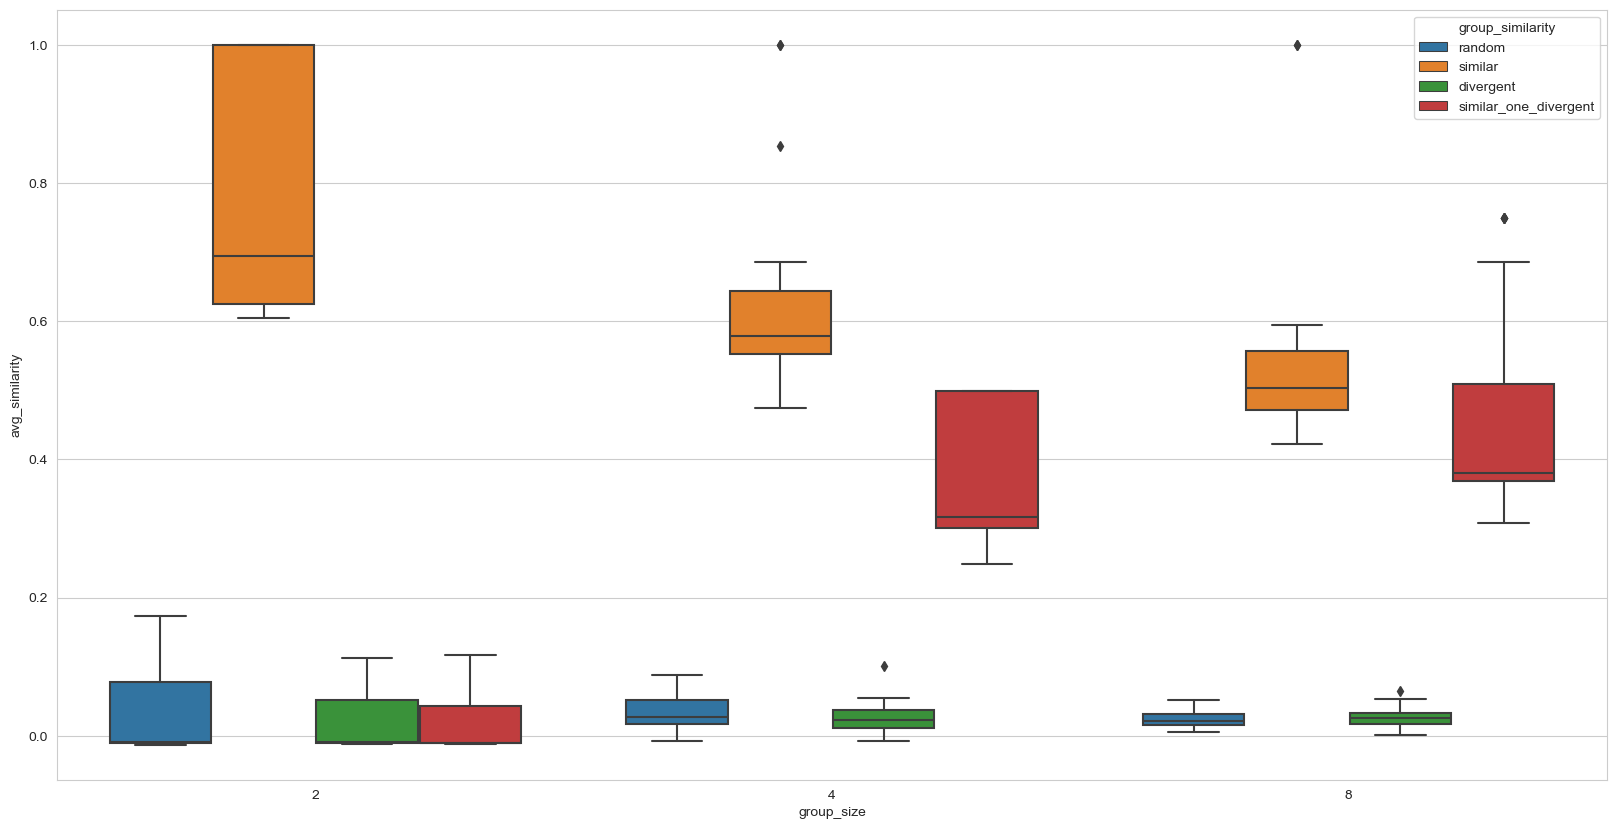

In [21]:
import seaborn as sns


plt.rcParams["figure.figsize"] = (20,10)
sns.boxplot(x = groups_df['group_size'],
            y = groups_df['avg_similarity'],
            hue = groups_df['group_similarity'])
import matplotlib.pyplot as plt

# Train/Test split

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

**Read in Data again for clean start**

In [23]:
ratings_df = pd.read_csv("../../Datasets/XWines_Slim_1K_wines_150K_ratings/XWines_Slim_150K_ratings.csv", low_memory=False, encoding="utf-8", memory_map=True)
wines_df = pd.read_csv("../../Datasets/XWines_Slim_1K_wines_150K_ratings/XWines_Slim_1K_wines.csv", low_memory=False, encoding="utf-8", memory_map=True)

In [24]:
ratings_df.head()

,RatingID,UserID,WineID,Vintage,Rating,Date
0,143,1356810,103471,1950,4.5,2021-11-02 20:52:59
1,199,1173759,111415,1951,5.0,2015-08-20 17:46:26
2,348,1164877,111395,1952,5.0,2020-11-13 05:40:26
3,374,1207665,111433,1953,5.0,2017-05-05 06:44:13
4,834,1075841,111431,1955,5.0,2016-09-14 20:18:38


## Data pre-processing

**To ensure that the distribution of users in the training and test sets is similar, we use stratified sampling. This means that the proportion of users in each group (similar or dissimilar) is preserved in both the training and test sets.**

In [25]:
from sklearn.model_selection import train_test_split

# Data pre-processing

#Filter out users with fewer than 5 ratings
user_counts = ratings_df["UserID"].value_counts()
filtered_ratings_df = ratings_df[ratings_df["UserID"].isin(user_counts[user_counts >= 5].index)]

items_filtered = set(filtered_ratings_df["WineID"].tolist())
users_filtered = set(filtered_ratings_df["UserID"].tolist())
display(len(items_filtered))
display(len(users_filtered))

#Filter the wine_data to include only the wines present in the filtered ratings
filtered_wine_data = wines_df[wines_df["WineID"].isin(items_filtered)]
display(filtered_wine_data.shape)  #

#Perform the train-test split on the filtered ratings
train_df, test_df = train_test_split(filtered_ratings_df, test_size=0.2, stratify=filtered_ratings_df["UserID"])

#check of user coverage
train_users = set(train_df['UserID'].unique())
test_users = set(test_df['UserID'].unique())
missing_users = test_users - train_users
print(f"Missing users in train set: {len(missing_users)}")

train_items = set(train_df['WineID'].unique())
test_items = set(test_df['WineID'].unique())
missing_items = test_items - train_items
print(f"Missing items in train set: {len(missing_items)}")
print(f"Missing item IDs: {missing_items}")

if missing_items:
    missing_in_train_rows= train_df[train_df["WineID"].isin(missing_items)]
    train_df = pd.concat([train_df, missing_in_train_rows])
    test_df = test_df[~test_df["WineID"].isin(missing_items)]

#check again:
train_items = set(train_df['WineID'].unique())
test_items = set(test_df['WineID'].unique())
missing_items = test_items - train_items

print(f"Missing items in train set: {len(missing_items)}")
print(f"Missing item IDs: {missing_items}")

#Ensure train and test sets only contain wines from filtered_wine_data
train_wine_data = filtered_wine_data[filtered_wine_data["WineID"].isin(train_df["WineID"])].reset_index(drop=True)
test_wine_data = filtered_wine_data[filtered_wine_data["WineID"].isin(test_df["WineID"])].reset_index(drop=True)

display(train_wine_data.shape) 
display(test_wine_data.shape)   

1002

10254

(1002, 17)

Missing users in train set: 0
Missing items in train set: 4
Missing item IDs: {174121, 109547, 155249, 178374}
Missing items in train set: 0
Missing item IDs: set()


(998, 17)

(928, 17)

# Individual Recommendations

## Wine feature creation

In [26]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler

def create_wine_features(wine_data):
    """
    Create and combine wine features (textual, categorical, and numerical) from the wine data.
    
    Args:
    - wine_data: DataFrame containing wine feature data.
    
    Returns:
    - wine_features: Sparse matrix of combined wine features (without weights).
    """
    
    # Make a copy of the wine data to avoid modifying the original DataFrame
    wine_data = wine_data.copy()

    # Preprocessing 'Grapes' and 'Harmonize' columns (convert list to space-separated string)
    wine_data['Grapes'] = wine_data['Grapes'].apply(lambda x: ' '.join(eval(x)))
    wine_data['Harmonize'] = wine_data['Harmonize'].apply(lambda x: ' '.join(eval(x)))

    # Function to handle mixed vintages: list or integer
    def convert_to_list(vintages):
        if isinstance(vintages, int):
            return [str(vintages)] 
        elif isinstance(vintages, str):
            try:
                return list(map(str, eval(vintages)))  
            except:
                return [str(vintages)]  
        else:
            return [str(vintages)]  

    #Apply the conversion to the 'Vintages' column and convert to space-separated string
    wine_data['Vintages'] = wine_data['Vintages'].apply(convert_to_list)
    wine_data['Vintages'] = wine_data['Vintages'].apply(lambda x: ' '.join(x))

    #TFIDf vectorization for textual features (Grapes, Harmonize, Vintages)
    tfidf = TfidfVectorizer()
    wine_data_tfidf_grapes = tfidf.fit_transform(wine_data['Grapes'])
    wine_data_tfidf_harmonize = tfidf.fit_transform(wine_data['Harmonize'])
    wine_data_tfidf_vintages = tfidf.fit_transform(wine_data['Vintages'])

    #One-hot encoding for categorical features ('Type', 'Body', 'Acidity', 'Country', 'RegionName', 'WineryName')
    one_hot = OneHotEncoder()
    categorical_features = ['Type', 'Body', 'Acidity', 'Country', 'RegionName', 'WineryName']
    wine_categorical_onehot = one_hot.fit_transform(wine_data[categorical_features])

    #Scale the numerical feature 'ABV'
    scaler = StandardScaler()
    wine_abv_scaled = scaler.fit_transform(wine_data[['ABV']])

    #Combine all features into a single sparse matrix
    wine_features = sp.hstack([
        wine_data_tfidf_grapes, 
        wine_data_tfidf_harmonize, 
        wine_data_tfidf_vintages,
        wine_categorical_onehot, 
        wine_abv_scaled
    ]).tocsr()

    return (wine_features, wine_categorical_onehot, wine_abv_scaled, 
            wine_data_tfidf_grapes, wine_data_tfidf_harmonize, wine_data_tfidf_vintages)

In [27]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

def calculate_optimal_weights(wine_features_train, y_train):
    """
    Calculate the optimal weights for the wine features using scipy.optimize.minimize.
    Best_weights: Optimized weights for each feature.
    """
    
    def objective_function(weights):

        weighted_wine_features = wine_features_train.multiply(weights)

        predictions = np.mean(weighted_wine_features, axis=1).A1  
        
        mse = mean_squared_error(y_train, predictions)
        return mse

    # Initial guess for weights (all set to 1.0)
    initial_weights = [1.0] * wine_features_train.shape[1]

    # Define bounds for each weight (e.g., between 0.1 and 3.0)
    bounds = [(0.1, 3.0)] * wine_features_train.shape[1]

    # Use scipy.optimize.minimize with 'L-BFGS-B' method
    result = minimize(objective_function, initial_weights, method='L-BFGS-B', bounds=bounds)

    # Return the optimized weights
    return result.x


In [28]:
import scipy.sparse as sp

def apply_optimized_weights_to_features(wine_features, wine_categorical_onehot, wine_abv_scaled,
                                        wine_data_tfidf_grapes, wine_data_tfidf_harmonize, 
                                        wine_data_tfidf_vintages, 
                                        optimized_weights):
    """
    Apply the optimized weights to the wine features and return the final weighted feature matrix.
    Returns:
    - weighted_wine_features: The final weighted sparse matrix of wine features.
    """
    # Get the sizes of each feature group
    grapes_size = wine_data_tfidf_grapes.shape[1]
    harmonize_size = wine_data_tfidf_harmonize.shape[1]
    vintages_size = wine_data_tfidf_vintages.shape[1]
    one_hot_size = wine_categorical_onehot.shape[1]
    abv_size = wine_abv_scaled.shape[1]  # ABV should be 1 column, but we handle it for consistency

    #Apply weights to the TFIDF features
    wine_data_tfidf_grapes_weighted = wine_features[:, :grapes_size] * optimized_weights[0]
    wine_data_tfidf_harmonize_weighted = wine_features[:, grapes_size:grapes_size + harmonize_size] * optimized_weights[1]
    wine_data_tfidf_vintages_weighted = wine_features[:, grapes_size + harmonize_size:grapes_size + harmonize_size + vintages_size] * optimized_weights[2]

    #Apply weights to the one-hot encoded categorical features
    start = grapes_size + harmonize_size + vintages_size
    wine_categorical_onehot_weighted = wine_features[:, start:start + one_hot_size] * optimized_weights[3]
    
    #Apply weight to the scaled ABV feature (the last feature in the matrix)
    wine_abv_scaled_weighted = wine_features[:, start + one_hot_size:start + one_hot_size + abv_size] * optimized_weights[4]

    #Combine all the weighted features back into a single sparse matrix
    weighted_wine_features = sp.hstack([
        wine_data_tfidf_grapes_weighted, 
        wine_data_tfidf_harmonize_weighted, 
        wine_data_tfidf_vintages_weighted,
        wine_categorical_onehot_weighted,
        wine_abv_scaled_weighted
    ]).tocsr()

    return weighted_wine_features


## Wine feature creation

In [29]:
#Calculate the basic wine features
(wine_features_basic_train, wine_categorical_onehot, wine_abv_scaled,wine_data_tfidf_grapes, wine_data_tfidf_harmonize, wine_data_tfidf_vintages) = create_wine_features(train_wine_data)


In [30]:
y_train = train_df['Rating'].values
x_train = []
for idx, row in train_df.iterrows():
    user_id = row['UserID']
    wine_id = row['WineID']
    wine_index = train_wine_data.index[train_wine_data['WineID'] == wine_id].tolist()[0]
    wine_feature = wine_features_basic_train[wine_index]
    x_train.append(wine_feature)
x_train = sp.vstack(x_train)  

In [31]:
#Optimize weights using the training data
optimized_weights = calculate_optimal_weights(x_train, y_train)

In [32]:
(wine_features_basic_all, wine_categorical_onehot_all, wine_abv_scaled_all,wine_data_tfidf_grapes_all, wine_data_tfidf_harmonize_all, wine_data_tfidf_vintages_all) = create_wine_features(wines_df)

weighted_wine_features = apply_optimized_weights_to_features(wine_features=wine_features_basic_all, wine_categorical_onehot=wine_categorical_onehot_all, wine_abv_scaled=wine_abv_scaled_all,wine_data_tfidf_grapes=wine_data_tfidf_grapes_all, wine_data_tfidf_harmonize= wine_data_tfidf_harmonize_all, wine_data_tfidf_vintages=wine_data_tfidf_vintages_all,optimized_weights=optimized_weights)

## Individual Recommendation 

### Training of an Regressor for a single user

**Why KNN?** 
- Able to provide a reasonable quality of the recommendations with a relatively small number of ratings.

In [33]:
def train_regressor(user_id, train_df, wine_features, wine_data, n_neighbors=3):
    """
    Train a KNN regressor for a given user using the train_df and wine features.
    Returns:
    Knn: Trained KNN regressor for the user.
    """
    #Retrieve the ratings of this user from the train set
    user_train_ratings = train_df[train_df['UserID'] == user_id]
    
    #Get the WineIDs that this user has rated
    rated_wine_ids = user_train_ratings['WineID'].values
    
    #Retrieve the wine features for these rated wines
    wine_indices = [wine_data.index[wine_data['WineID'] == wid].tolist()[0] for wid in rated_wine_ids]
    X_train = wine_features[wine_indices, :]  # Features of rated wines
    y_train = user_train_ratings['Rating'].values  # The user's ratings
    
    #Train the KNN regressor
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    
    return knn

### Predictions for a user from the test set for all wines contained in the test set

In [34]:
def predict_for_user(user_id, regressor, test_df, wine_features, wine_data):
    """
    Make predictions for a given user on all wines in the test set.
    
    Returns:
    Predictions: DataFrame containing WineID and predicted ratings for this user.
    """
    #Retrieve all wines in the test set
    test_wine_ids = test_df['WineID'].unique()
    
    #Get the wine features for all wines in the test set
    wine_indices = [wine_data.index[wine_data['WineID'] == wid].tolist()[0] for wid in test_wine_ids]
    X_test = wine_features[wine_indices, :]
    
    #Make predictions for all test wines
    predicted_ratings = regressor.predict(X_test)
    
    #Return a DataFrame with the predicted ratings
    predictions = pd.DataFrame({
        'user': user_id,
        'item': test_wine_ids,
        'rating': predicted_ratings
    })
    
    return predictions

### Predictions for users from the test set for all wines contained in the test set

In [35]:
def predict_for_all_users(train_df, test_df, wine_features, wine_data):
    """
    Train a regressor for each user and predict ratings on the test set.   
    Returns:
    All_predictions: DataFrame containing predictions for all users.
    """
    all_predictions = []
    
    #Loop through each user in the test set
    test_users = test_df['UserID'].unique()
    
    for user_id in test_users:
        #Train the regressor for this user using their training data
        regressor = train_regressor(user_id, train_df, wine_features, wine_data)
        
        #Predict ratings for all wines in the test set for this user
        user_predictions = predict_for_user(user_id, regressor, test_df, wine_features, wine_data)
        
        #Append predictions to the list
        all_predictions.append(user_predictions)
    
    # Concatenate all user predictions into a single DataFrame
    all_predictions_df = pd.concat(all_predictions, ignore_index=True)
    
    return all_predictions_df

In [36]:
all_predictions_df = predict_for_all_users(train_df, test_df, weighted_wine_features, wines_df)

In [37]:
all_predictions_df.head

<bound method NDFrame.head of             user    item    rating
0        1135855  106752  3.666667
1        1135855  179039  3.500000
2        1135855  167443  3.833333
3        1135855  155368  3.666667
4        1135855  162841  3.666667
...          ...     ...       ...
9515707  1166271  104585  5.000000
9515708  1166271  142170  4.666667
9515709  1166271  146941  5.000000
9515710  1166271  143191  5.000000
9515711  1166271  144081  4.666667

[9515712 rows x 3 columns]>

# Aggregation strategies

**In the following we will look at differnt Aggregation strategies such as:**
- Additive Aggregator
- LeastMiseryAggregator
- BalancedAggregator
- EPFuzzDAAggregator

In [38]:
import aggregation_strategies.aggregators as aggr_utils


# all aggregation_strategies = ["BASE", "ADD", "LMS", "GFAR", "EPFuzzDA"]
#aggregation_strategies = ["BASE", "ADD", "LMS"]
aggregation_strategies = ["BASE"]

recommendations_number = 10 #number of recommendations to make

def generate_group_recommendations_forall_groups(test_df, group_dict, recommendations_number):
    group_recommendations = dict()
    for group_id in group_dict:
        
        # extract group info
        group = group_dict[group_id]
        group_size = group['group_size']
        group_similarity = group['group_similarity']
        group_members = group['group_members']
            
        group_ratings = test_df.loc[test_df['user'].isin(group_members)]
        
        group_rec = dict()
        for aggregation_strategy in aggregation_strategies:
            agg = aggr_utils.AggregationStrategy.getAggregator(aggregation_strategy)
            group_rec = {**group_rec, **agg.generate_group_recommendations_for_group(group_ratings, recommendations_number)}
        
        
        group_recommendations[group_id] = group_rec
        
    return group_recommendations

In [39]:
group_recommendations = generate_group_recommendations_forall_groups(all_predictions_df, group_dict, recommendations_number)

# Evaluating the Group Recommender System

In [40]:
test_df = test_df.rename(columns={'UserID':'user', 'WineID':'item', 'Rating':'rating'})

In [41]:
# Global settings
binarize_feedback = True
binarize_feedback_positive_threshold = 3  # Set a threshold for binarization

def evaluateUserNDCG(user_ground_truth, group_recommendation):
    dcg = 0

    for k, item in enumerate(group_recommendation):
        dcg = dcg + ((user_ground_truth.loc[item, "final_rating"] if item in user_ground_truth.index else 0) / np.log2(k + 2)) # +2? CHeck with the course slides

    idcg = 0
    user_ground_truth.sort_values("final_rating", inplace=True, ascending=False)
    for k in range(min(len(user_ground_truth), len(group_recommendation))):
        idcg = idcg + (user_ground_truth.iloc[k]["final_rating"] / np.log2(k + 2)) # +2? CHeck with the course slides
    if idcg > 0:
        ndcg = dcg / idcg
    else:
        ndcg = 0

    return ndcg


def evaluateGroupRecommendation(group_ground_truth, group_recommendation, group_members, binarize_feedback, binarize_feedback_positive_threshold):
    ndcg_list = list()
    dcg_list = list()
    
    for user in group_members:
        user_ground_truth = group_ground_truth.loc[group_ground_truth['user'] == user]
        user_ground_truth.set_index("item", inplace=True)

        # feedback binarization
        if binarize_feedback:
            user_ground_truth["final_rating"] = 0
            user_ground_truth.loc[user_ground_truth.rating >= binarize_feedback_positive_threshold, "final_rating"] = 1         
        else:
            user_ground_truth["final_rating"] = user_ground_truth["rating"]
        
        ndcg_user = evaluateUserNDCG(user_ground_truth, group_recommendation)
        ndcg_list.append(ndcg_user)

        # failsafe for all negative results
        if np.amax(ndcg_list) > 0:
            ndcg_min_max = np.amin(ndcg_list) / np.amax(ndcg_list)
        else:
            ndcg_min_max = 0.0
    
    return [
        {
            "metric": "NDCG",
            "aggr_metric": "mean",
            "value": np.mean(ndcg_list)
        },
        {
            "metric": "NDCG",
            "aggr_metric": "min",
            "value": np.amin(ndcg_list)
        },
        {
            "metric": "NDCG",
            "aggr_metric": "minmax",
            "value": ndcg_min_max
        }
    ]

def evaluate_group_recommendations_forall_groups(ground_truth, group_recommendations, group_dict):
                                                 
    group_evaluations = list()
    for group_id in group_dict:
        
        
        # extract group info
        group = group_dict[group_id]
        group_size = group['group_size']
        group_similarity = group['group_similarity']
        group_members = group['group_members']
        group_rec = group_recommendations[group_id]
            
        # filter ratings in ground_truth for the group members
        group_ground_truth = ground_truth.loc[ground_truth['user'].isin(group_members)]
        

        for aggregation_strategy in group_rec:
            agg_group_rec = group_rec[aggregation_strategy]
            agg_group_rec_eval = evaluateGroupRecommendation(group_ground_truth, agg_group_rec, group_members, binarize_feedback, binarize_feedback_positive_threshold)    
            # Adding aggregation strategy info
            for row in agg_group_rec_eval:
                row['aggregation_strategy'] = aggregation_strategy
                row['group_id'] = group_id

            group_evaluations = group_evaluations + agg_group_rec_eval
        
    return group_evaluations    




In [42]:
import warnings
warnings.filterwarnings('ignore')

ground_truth = all_predictions_df
decoupled_results = evaluate_group_recommendations_forall_groups(ground_truth, group_recommendations, group_dict)

ground_truth = test_df
coupled_results = evaluate_group_recommendations_forall_groups(ground_truth, group_recommendations, group_dict)

# WE USE DECOUPLED RESULTS - MUCH MORE ACCURATE SINCE WE USE THE PREDICTED RATINGS INSTEAD OF DIRECTLY FROM THE TEST SET

# Create DataFrame for evaluation results
eval_df = pd.DataFrame.from_records(decoupled_results)

group_composition_DF = pd.DataFrame(group_dict).T
eval_df_with_group_info = group_composition_DF.join(eval_df.set_index("group_id")).reset_index()
eval_df_with_group_info.head()

,index,group_size,group_similarity,group_members,avg_similarity,metric,aggr_metric,value,aggregation_strategy
0,0,2,random,"[1289797, 1393700]",-0.009674,NDCG,mean,1.0,ADD
1,0,2,random,"[1289797, 1393700]",-0.009674,NDCG,min,1.0,ADD
2,0,2,random,"[1289797, 1393700]",-0.009674,NDCG,minmax,1.0,ADD
3,0,2,random,"[1289797, 1393700]",-0.009674,NDCG,mean,1.0,MUL
4,0,2,random,"[1289797, 1393700]",-0.009674,NDCG,min,1.0,MUL


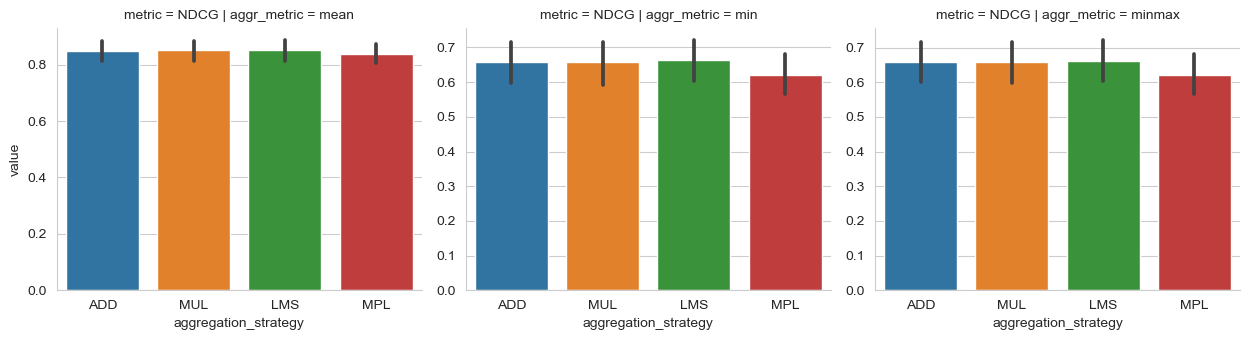

In [43]:
all_group_res = eval_df.groupby(['metric', 'aggr_metric', 'aggregation_strategy']).mean().reset_index()

g = sns.catplot(data=eval_df, row="metric", col="aggr_metric", 
                   x="aggregation_strategy", y="value", sharex=False, sharey=False,
                   kind="bar",  height=3.5, aspect=1.2)

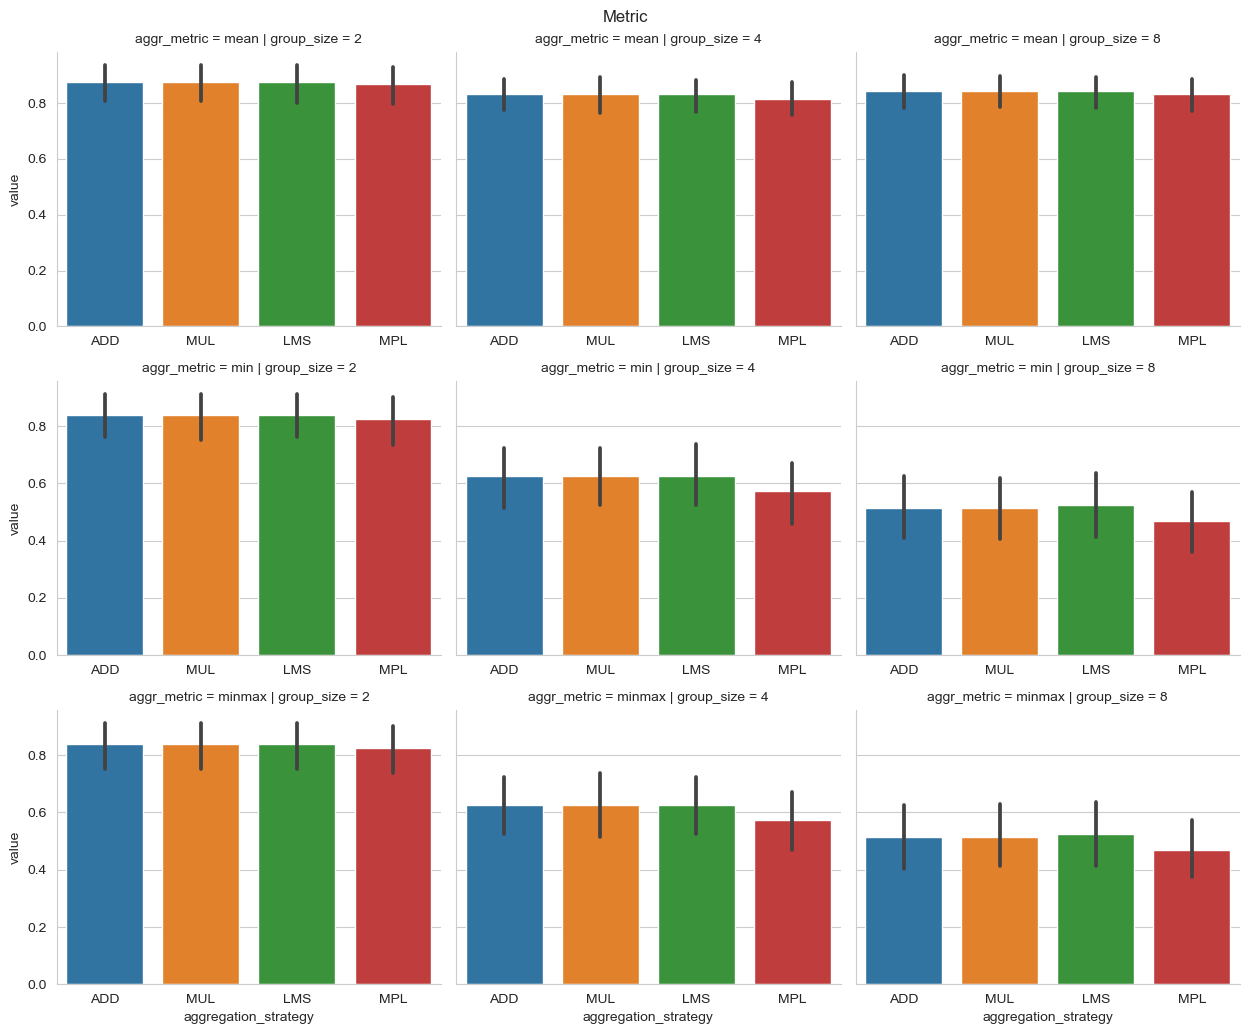

In [44]:
g = sns.catplot(data=eval_df_with_group_info, col="group_size", row="aggr_metric", 
                   x="aggregation_strategy", y="value", sharex=False, sharey="row",
                   kind="bar",  height=3.5, aspect=1.2)
plt.suptitle("Metric")
plt.tight_layout()

In [45]:
def evaluateGroupRecommendationPrecisionRecall(group_ground_truth, group_recommendation, group_members, binarize_feedback, binarize_feedback_positive_threshold):
    precision_list = []
    recall_list = []

    for user in group_members:
        user_ground_truth = group_ground_truth.loc[group_ground_truth['user'] == user]
        user_ground_truth.set_index("item", inplace=True)

        # Feedback binarization
        if binarize_feedback:
            user_ground_truth["final_rating"] = 0
            user_ground_truth.loc[user_ground_truth.rating >= binarize_feedback_positive_threshold, "final_rating"] = 1         
        else:
            user_ground_truth["final_rating"] = user_ground_truth["rating"]

        # Calculate Precision and Recall
        true_positives = np.sum((user_ground_truth["final_rating"] == 1) & (user_ground_truth.index.isin(group_recommendation)))
        predicted_positives = len(group_recommendation)
        actual_positives = np.sum(user_ground_truth["final_rating"] == 1)

        precision = true_positives / predicted_positives if predicted_positives > 0 else 0
        recall = true_positives / actual_positives if actual_positives > 0 else 0

        precision_list.append(precision)
        recall_list.append(recall)

    return [
        {
            "metric": "Precision",
            "aggr_metric": "mean",
            "value": np.mean(precision_list)
        },
        {
            "metric": "Precision",
            "aggr_metric": "min",
            "value": np.amin(precision_list)
        },
        {
            "metric": "Precision",
            "aggr_metric": "minmax",
            "value": np.amin(precision_list) / (np.amax(precision_list) if np.amax(precision_list) > 0 else 1)
        },
        {
            "metric": "Recall",
            "aggr_metric": "mean",
            "value": np.mean(recall_list)
        },
        {
            "metric": "Recall",
            "aggr_metric": "min",
            "value": np.amin(recall_list)
        },
        {
            "metric": "Recall",
            "aggr_metric": "minmax",
            "value": np.amin(recall_list) / (np.amax(recall_list) if np.amax(recall_list) > 0 else 1)
        }
    ]


In [46]:
# Evaluate recommendations for NDCG
ground_truth = all_predictions_df
decoupled_results_ndcg = evaluate_group_recommendations_forall_groups(ground_truth, group_recommendations, group_dict)

# Evaluate recommendations for Precision and Recall
decoupled_results_precision_recall = []
for group_id in group_dict:
    group = group_dict[group_id]
    group_members = group['group_members']
    group_rec = group_recommendations[group_id]
    
    group_ground_truth = ground_truth.loc[ground_truth['user'].isin(group_members)]
    
    for aggregation_strategy in group_rec:
        agg_group_rec = group_rec[aggregation_strategy]
        agg_group_rec_eval = evaluateGroupRecommendationPrecisionRecall(group_ground_truth, agg_group_rec, group_members, binarize_feedback, binarize_feedback_positive_threshold)    

        for row in agg_group_rec_eval:
            row['aggregation_strategy'] = aggregation_strategy
            row['group_id'] = group_id

        decoupled_results_precision_recall += agg_group_rec_eval

# Create DataFrame for Precision and Recall results
eval_df_precision_recall = pd.DataFrame.from_records(decoupled_results_precision_recall)


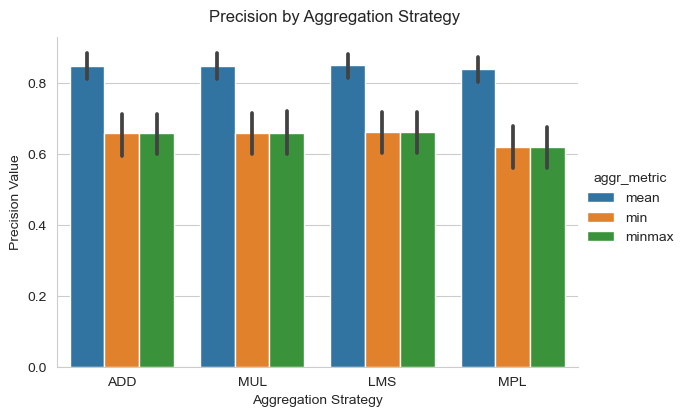

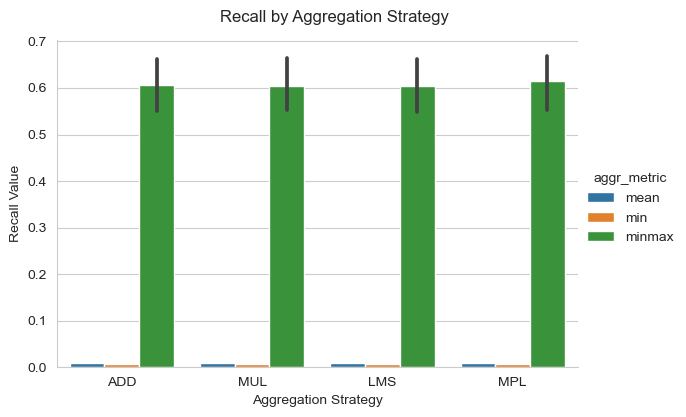

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting Precision
g_precision = sns.catplot(data=eval_df_precision_recall[eval_df_precision_recall['metric'] == 'Precision'], 
                          x="aggregation_strategy", y="value", hue="aggr_metric",
                          kind="bar", height=4, aspect=1.5)
g_precision.set_axis_labels("Aggregation Strategy", "Precision Value")
g_precision.fig.suptitle("Precision by Aggregation Strategy", y=1.03)

# Plotting Recall
g_recall = sns.catplot(data=eval_df_precision_recall[eval_df_precision_recall['metric'] == 'Recall'], 
                       x="aggregation_strategy", y="value", hue="aggr_metric",
                       kind="bar", height=4, aspect=1.5)
g_recall.set_axis_labels("Aggregation Strategy", "Recall Value")
g_recall.fig.suptitle("Recall by Aggregation Strategy", y=1.03)

plt.show()
